# Working Notebook for creating wndchrm features

## Step 1
### Load nessecary modules

In [1]:
# Add python modules

import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
fe = simr.fe
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
fe.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
FE: Hi!  You're in Matthew's module for extracting feature values from images.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")

# Get run info class
rInfo = tInfo.getRunInfo( rID='run_0000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Target Good!
Run 'run_0000' Good!


___
## Step 3
### Load a starting image and image parameter for target
Loading a previous image allows you to start with the correct image size and pixel centers for an associated target image.

{'cmpArg': {'direct_compare_function': 'absolute_difference',
            'targetName': 'zoo_0',
            'targetType': 'target_image',
            'type': 'direct_image_comparison'},
 'comment': 'Starting score parameters '
            'file for '
            '587722984435351614',
 'imgArg': {'comment': 'Starting image '
                       'parameters for '
                       '587722984435351614',
            'galaxy_centers': {'px': 513,
                               'py': 514,
                               'sx': 309,
                               'sy': 608},
            'image_size': {'height': 1024,
                           'width': 1024},
            'name': 'zoo_0'},
 'name': 'zoo_0',
 'scoreType': 'model_fitness_score',
 'simArg': {'nPts': '100k',
            'name': '100k'}}


Text(0.5, 1.0, 'Starting Target Image')

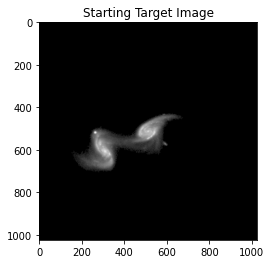

In [3]:
# Change image name if you want to grab a different image parameter
old_name = 'zoo_0'
old_params = tInfo.getImageParams(  )
old_param = old_params[old_name]

# This image parameter should have the correct size and pixel centers
gm.pprint( old_param )

tInfo.addImageParams( old_param, overWrite = True )

# Get target image for 
target_image = tInfo.getTargetImage(old_name)
plt.imshow(target_image,cmap='gray')
plt.title("Starting Target Image")



___
## Step 4: Create a new image parameter


In [4]:
# Create a blank group score parameter and copy starting parameters
newName = 'chime_test_param'
newImgName = 'chime_test_image_2'
new_params = {}
new_params[newName] = deepcopy( old_param )

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName]['comment'] = 'Developing initial WNDCHRM implementation'
new_params[newName]['imgArg']['name'] = newImgName
new_params[newName]['imgArg']['type'] = 'wndchrm'

# Leave a comment if its for a specific experiment
cmt = 'Developing the creation process for new wndchrm photos'
new_params[newName]['imgArg']['comment'] = cmt

# If you want to resize the image
new_params[newName]['imgArg']['image_size']['width'] = 100
new_params[newName]['imgArg']['image_size']['height'] = 100

# If you want to change the galaxy centers
# Primary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['px'] = 33
new_params[newName]['imgArg']['galaxy_centers']['py'] = 50
# Secondary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['sx'] = 67
new_params[newName]['imgArg']['galaxy_centers']['sy'] = 50
# NOTE!: If image size and/or galaxy centers are modified,
#        you'll need to create a new target image to match.
new_params[newName]['cmpArg']['targetName'] = newImgName


# If you want to modify the image blurring affect
new_params[newName]['imgArg']['blur'] = {}
new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
new_params[newName]['imgArg']['blur']['size'] = 5
new_params[newName]['imgArg']['blur']['weight'] = .5


# If you want to modify the radial brightness constant
pc = 1.5    # primary galaxy
sc = 1.5     #secondary galaxy
new_params[newName]['imgArg']['radial_const'] = [ pc, sc ]

# If you want to modify the final image brightness normalization
new_params[newName]['imgArg']['normalization'] = {}
new_params[newName]['imgArg']['normalization']['type'] = 'type1'
new_params[newName]['imgArg']['normalization']['norm_constant'] = 2.5

new_params[newName]['featArg'] = {}
new_params[newName]['featArg']['type'] = 'wndchrm_all'

gm.pprint(new_params)

{'chime_test_param': {'cmpArg': {'direct_compare_function': 'absolute_difference',
                                 'targetName': 'chime_test_image_2',
                                 'targetType': 'target_image',
                                 'type': 'direct_image_comparison'},
                      'comment': 'Developing '
                                 'initial '
                                 'WNDCHRM '
                                 'implementation',
                      'featArg': {'type': 'wndchrm_all'},
                      'imgArg': {'blur': {'size': 5,
                                          'type': 'gaussian_blur',
                                          'weight': 0.5},
                                 'comment': 'Developing '
                                            'the '
                                            'creation '
                                            'process '
                                            'for '
                       


IC: Adusting Starting Target Image

	 - From points:
[[513. 514.]
 [309. 608.]
 [607. 718.]]
	 - To points:
[[33. 50.]
 [67. 50.]
 [33. 16.]]
	 - Warp Matrix
[[-1.37477206e-01  6.33473400e-02  7.09652739e+01]
 [-6.33473400e-02 -1.37477206e-01  1.53160469e+02]]
	 - Writing to loc: /home/mbo2d/587722984435351614/information/target_images/target_chime_test_image_2.png
	 - File should exist: /home/mbo2d/587722984435351614/information/target_images/target_chime_test_image_2.png


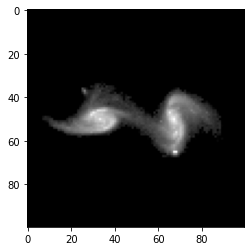

In [15]:
# Function in Image Creator that modifes
# exsiting target images to match new image

# Create and return new target image
tImg = ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True, printAll = True )

tImg2 = tInfo.getTargetImage( newImgName, overwrite=True )

if type(tImg2) != type(None):
    plt.imshow( gm.float32_to_uint8(tImg2), cmap='gray')

else:
    print("WARNING!  Target image not found")

In [5]:
from os import listdir
newLoc = './../param/chime_test.json'
gm.saveJson( new_params, newLoc)
tmp = gm.readJson( newLoc )
#gm.pprint(tmp)

In [6]:
rArg = gm.inArgClass()
rArg.printAll = True
rArg.setArg( 'rInfo', rInfo )
#rArg.setArg( 'newImage', True )
rArg.setArg( 'newFeats', True )
#rArg.setArg( 'newScore', True )
rArg.setArg( 'paramLoc', newLoc )
rArg.setArg( 'overWrite', True )

simr.simr_run( arg=rArg, rInfo=rInfo)

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f71596768e0>
FE: image_creator_run
FE: rInfo.status:  True
FE: given parameters: 1
FE: name/type: chime_test_param/wndchrm_all
FE_LOOP:   1 /   1 COMPLETE!


In [14]:

def wndchrm_all( rInfo, arg, fParam ):
    from shutil import which
    from os import remove, listdir
    import subprocess 
    
    # extract variables
    printBase=arg.printBase
    printAll=arg.printAll
    
    if printAll: print("FE: wndchrm_all: Notebook development")
        
    print( '***'*5 + " WORKING " + '***'*5 )
    
    wndDir = rInfo.get('wndDir')
    allLoc = wndDir + 'wndchrm_all.fit'
    wndchrm_command = [ 'wndchrm', 'train', wndDir, allLoc ]
    
    
    # If None, assumed wndchrm not installed/in public executable path.
    wndchrm_path = which('wndchrm')
    if wndchrm_path == None:
        print("FE: WARNING: WNDCHRM executable not found")
        return 
    
    if printAll: gm.tabprint("Run WNDCHRM dir: %s"%wndDir)
    
    # If overwriting, remove current files
    if arg.get('overWrite',False):
        if printAll: gm.tabprint("Removing .sig files  WNDCHRM dir")
        
        if gm.validPath( allLoc ): remove( allLoc )
        
        wndFiles = listdir( wndDir )
        for name in wndFiles:
            if '.sig' in name:
                fLoc = wndDir + name
                remove( fLoc )
    
    if printAll:
        print("FE: wndchrm_all: Executing:")
        gm.tabprint( '$ %s' % ' '.join(wndchrm_command))
        
    cmd_results = subprocess.run(wndchrm_command)
    
    if printAll: print("FE: wndchrm_all: Execution Done")
    
        
#fe.set_test_func( wndchrm_all )
    
simr.simr_run( arg=rArg, rInfo=rInfo)

SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f71596768e0>
FE: image_creator_run
FE: rInfo.status:  True
FE: given parameters: 1
FE: name/type: chime_test_param/wndchrm_all
FE: wndchrm_all: Notebook development
*************** WORKING ***************
	 - Run WNDCHRM dir: /home/mbo2d/587722984435351614/zoo_merger_models/run_0000/wndchrm_files/
	 - Removing .sig files  WNDCHRM dir
FE: wndchrm_all: Executing:
	 - $ wndchrm train /home/mbo2d/587722984435351614/zoo_merger_models/run_0000/wndchrm_files/ /home/mbo2d/587722984435351614/zoo_merger_models/run_0000/wndchrm_files/wndchrm_all.fit
FE_LOOP:   1 /   1 COMPLETE!


___
## Step 4.1
### Create a new target Image
If the size and centers were modified, then create a new target image to match the size and centers


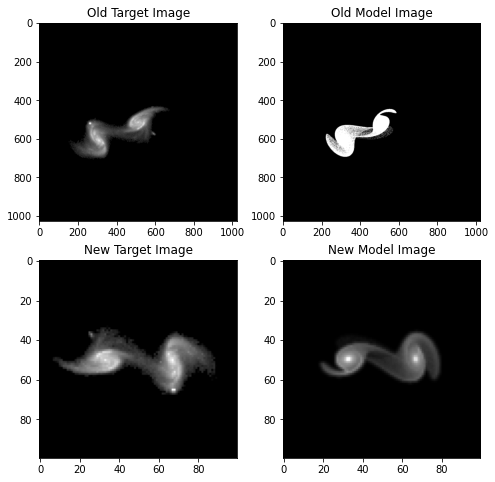

In [8]:
# View new model image next to target image
fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( gm.float32_to_uint8( tInfo.getTargetImage( old_param['cmpArg']['targetName']) ), cmap='gray' )
#ax[0,0].imshow( tInfo.getTargetImage( old_param['cmpArg']['targetName']) )

ax[0,1].set_title("Old Model Image")
ax[0,1].imshow( gm.float32_to_uint8( rInfo.getModelImage( old_param['imgArg']['name'] ) ), cmap='gray' )

ax[1,0].set_title("New Target Image")
ax[1,0].imshow( gm.float32_to_uint8( tInfo.getTargetImage( newImgName ) ), cmap='gray' )

ax[1,1].set_title("New Model Image")
ax[1,1].imshow( gm.float32_to_uint8( rInfo.getModelImage( newImgName ) ), cmap='gray' )

___
## Step 5
### Test if SIMR pipeline can create the new model image!

In [17]:

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))
    print(rInfo.get('tInfo').status)

# Define arguments for executing simr
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'rInfo', rInfo )  # Give rInfo
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newFeats', True )
newImgArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

# Run through simr image creation
simr.simr_run( rInfo=rInfo, arg = newImgArg )
rInfo.printScores(allScores=True)

Run 'run_0000' Good!
True
SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f71596768e0>
IC: image_creator_run
IC: rInfo.status:  True
WORKING**********************************************
MAX:  100
FE: image_creator_run
FE: rInfo.status:  True
*************** WORKING ***************
FE_LOOP:   1 /   1 COMPLETE!
MS: Run:
IM: run_info_class.printScores()
	 - run_id: run_0000
	 - zoo_merger: 0.9459459459459459
	 - machine_scores: 1
	 - chime_test_param: 0.980660


___
## Step 5.1
### View results for the new Model Image!

TypeError: Image data of dtype object cannot be converted to float

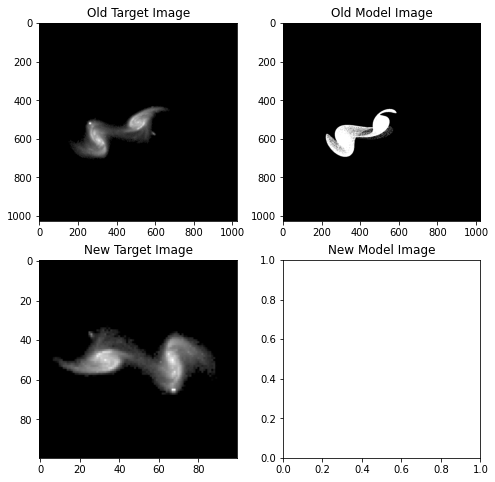

In [10]:
# View new model image next to target image
mImg = rInfo.getModelImage( newName )

fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( tInfo.getTargetImage(old_param['cmpArg']['targetName']), cmap='gray' )

ax[0,1].set_title("Old Model Image")
ax[0,1].imshow( rInfo.getModelImage( old_param['imgArg']['name'] ), cmap='gray' )

ax[1,0].set_title("New Target Image")
ax[1,0].imshow(tImg,cmap='gray')

ax[1,1].set_title("New Model Image")
ax[1,1].imshow(mImg,cmap='gray')

___
## Step 6
### Save your new image parameters!

In [ ]:
# Add to target image repository
tInfo.addImageParams( new_params, overWrite=True )

# Or save to a location of your choosing
tInfoLoc = tInfo.get("infoDir")
imgParamLoc = '../param/' + 'param_zoo_test.json'
gm.saveJson( new_params, imgParamLoc )

In [ ]:
gm.pprint(old_params)

i = 1

for nVal in np.arange( 1.5, 4.0, 0.5 ):
    print(nVal)

    # Create a blank group score parameter and copy starting parameters
    newName = 'chime_%d' % i
    i += 1
    
    new_params[newName] = deepcopy( new_params['chime_0'] )

    # ALWAYS modify the names
    new_params[newName]['name'] = newName
    new_params[newName]['imgArg']['name'] = newName

    
    # If you want to modify the image blurring affect
    new_params[newName]['imgArg']['blur'] = {}
    new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
    new_params[newName]['imgArg']['blur']['size'] = 5
    new_params[newName]['imgArg']['blur']['weight'] = 1.5

    # If you want to modify the radial brightness constant
    pc = 2.5    # primary galaxy
    sc = 1.5     #secondary galaxy
    new_params[newName]['imgArg']['radial_const'] = [ pc, sc ]
    

    # If you want to modify the final image brightness normalization
    new_params[newName]['imgArg']['normalization'] = {}
    new_params[newName]['imgArg']['normalization']['type'] = 'type1'
    new_params[newName]['imgArg']['normalization']['norm_constant'] = nVal

#gm.pprint(new_params)

In [ ]:

# Define arguments for executing simr
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'rInfo', rInfo )  # Give rInfo
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

# Run through simr image creation
simr.simr_run( rInfo=rInfo, arg = newImgArg )
rInfo.printScores(allScores=True)

In [ ]:

def plot_image_list( params, rInfo ):
    n = len(params)
    
    fig, ax = plt.subplots(n,figsize=(8,4*n))
    
    for i, n in enumerate(params):

        ax[i].set_title( params[n]['imgArg']['name'] )
        img = rInfo.getModelImage( params[n]['imgArg']['name'] )
        if type(img) != type(None):
            ax[i].imshow( img, cmap='gray' )


plot_image_list( new_params, rInfo )